# The Chi-Squared Test for Proportions (or Independence)


> Use Case
- Used to compare observed and expected frequencies of categorical data, particularly when comparing proportions across different categorical groups.
- Used for feature selection, to determine if a feature is a good predictor.
> Assumptions
- The data must be categorical and fit into a contingency table.
- The expected frequency in each cell of the contingency table should be at least 5 (to ensure the validity of the test).
> Example Scenario
- Comparing the satisfaction levels of customers (Satisfied/Not Satisfied) between two different versions of a website.
> Null Hypothesis (H0):
- Feature Selection: The categories are independent
- Proportions: The proportion of successes is the same for both groups.
> Alternative Hypothesis (H1):
- Feature Selection: The categories are dependent
- Proportions: The proportion of successes is different for both groups.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install statsmodels==0.12.2
from statsmodels.stats.power import GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare, proportion_effectsize

# !pip install scipy==1.12.0
from scipy.stats import chi2_contingency, chi2

# !pip install pingouin==0.5.4
from pingouin import chi2_independence, power_chi2 


In [2]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [3]:
import scipy
scipy.__version__

'1.12.0'

In [4]:
import pingouin
pingouin.__version__

'0.5.4'

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

In [6]:
# set seaborn style
sns.set(style="white", palette="mako")

# colors
color = 'slateblue'

# remove some borders    
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

### Power Analysis

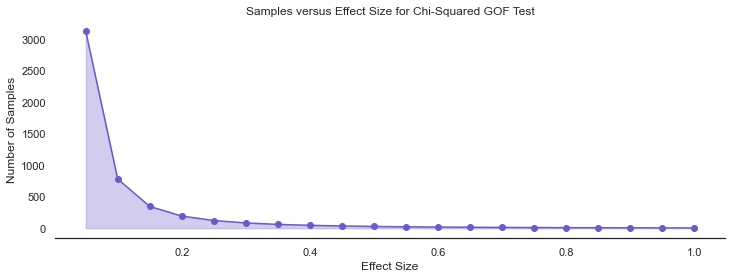

In [7]:
# Initialize GofChisquarePower
gof_power = GofChisquarePower()

# Given power and alpha
alpha=0.05
power=0.8

# Define effect sizes
effect_sizes = np.linspace(0.05, 1, 20) 
# Calculate number of samples for each effect size
samples = [gof_power.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power) for effect_size in effect_sizes]

# Figure size
plt.figure(figsize=(12, 4))

# Plot samples versus effect sizes
plt.plot(effect_sizes, samples, color=color, marker='o')

# Shade area below the line with lower opacity
plt.fill_between(effect_sizes, samples, color=color, alpha=0.3)

# Add plot labels and title
plt.xlabel('Effect Size')
plt.ylabel('Number of Samples')
plt.title('Samples versus Effect Size for Chi-Squared GOF Test')
plt.show()


In [8]:
# Chi-Squared Power Analysis (scipy)

# Degree of freedom (depends on the chosen test).
# A 2x2 contingency table has 1 degree of freedom. 
dof=1
# Cohen’s w effect size
# For a 2 x 2 table, the absolute value of the phi statistic is the same as Cohen's w. 
# The value of Cohen's w is not bound by 1 on the upper end.
w=0.1
# Test power (= 1 - type II error).
power=0.8
# Significance level (type I error probability).
alpha=0.05
# Exactly ONE of the parameters w, n, power and alpha must be passed as None, and that parameter is determined from the others. 
n=None

# The degrees of freedom dof must always be specified
sample_size = power_chi2(dof=dof, w=w, n=n, power=power, alpha=alpha)

print(f"There are {int(np.ceil(sample_size))} samples required per group")

There are 785 samples required per group


In [9]:
# Chi-Squared Power Analysis (statsmodels)

# Cohen’s w effect size
# For a 2 x 2 table, the absolute value of the phi statistic is the same as Cohen's w. 
# The value of Cohen's w is not bound by 1 on the upper end.
effect_size = 0.1
# Significance level (type I error probability).
alpha = 0.05
# Test power (= 1 - type II error).
power = 0.8
# Degree of freedom + 1 (depends on the chosen test).
# A 2x2 contingency table has 1 degree of freedom. 
n_bins=2
# Exactly ONE of the parameters must be passed as None, and that parameter is determined from the others. 
nobs = None

# The degrees of freedom dof must always be specified
sample_size = GofChisquarePower().solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, n_bins=n_bins)

print(f"There are {int(np.ceil(sample_size))} samples required per group")

There are 785 samples required per group


In [10]:
# Chi-Squared Power Analysis (pingouin)

# Degree of freedom (depends on the chosen test).
# A 2x2 contingency table has 1 degree of freedom. 
dof=1
# Cohen’s w effect size
# For a 2 x 2 table, the absolute value of the phi statistic is the same as Cohen's w. 
# The value of Cohen's w is not bound by 1 on the upper end.
w=0.1
# Significance level (type I error probability).
alpha = 0.05
# Test power (= 1 - type II error).
power = 0.8
# Exactly ONE of the parameters must be passed as None, and that parameter is determined from the others. 
n = None

# The degrees of freedom dof must always be specified
sample_size = power_chi2(dof=dof, w=w, power=power, alpha=alpha, n=n)

print(f"There are {int(np.ceil(sample_size))} samples required per group")

There are 785 samples required per group


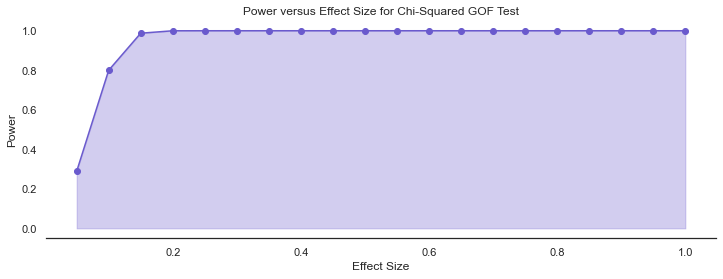

In [11]:
# Initialize GofChisquarePower
gof_power = GofChisquarePower()

# Given alpha 
alpha=0.05
# Given prior determined sample size
nobs = 785

# Define effect sizes
effect_sizes = np.linspace(0.05, 1, 20)  
# Calculate power for each effect size
powers = [gof_power.solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha) for effect_size in effect_sizes]

# Figure size
plt.figure(figsize=(12, 4))

# Plot power versus effect sizes
plt.plot(effect_sizes, powers, color=color, marker='o')

# Shade area below the line with lower opacity
plt.fill_between(effect_sizes, powers, color=color, alpha=0.3)

# Add plot labels and title
plt.xlabel('Effect Size')
plt.ylabel('Power')
plt.title('Power versus Effect Size for Chi-Squared GOF Test')
plt.show()


### Synthetic Data

In [12]:
# Number of samples for each version
n_samples = 785

# Generate synthetic data for two website versions
version_A = np.random.choice(['Satisfied', 'Not Satisfied'], size=n_samples, p=[0.25, 0.75])
version_B = np.random.choice(['Satisfied', 'Not Satisfied'], size=n_samples, p=[0.15, 0.85])


# Create pandas dataframe
chi_squared_data = pd.DataFrame({'Version_A': version_A, 'Version_B': version_B})
chi_squared_data

,Version_A,Version_B
0,Not Satisfied,Not Satisfied
1,Not Satisfied,Not Satisfied
2,Not Satisfied,Not Satisfied
3,Not Satisfied,Not Satisfied
4,Satisfied,Not Satisfied
...,...,...
780,Not Satisfied,Not Satisfied
781,Not Satisfied,Not Satisfied
782,Not Satisfied,Satisfied
783,Not Satisfied,Not Satisfied


In [13]:
# We'll use these later to build arrays to plug into the statistical functions

a_positive = chi_squared_data['Version_A'].value_counts()['Satisfied']
a_negative = chi_squared_data['Version_A'].value_counts()['Not Satisfied']

b_positive = chi_squared_data['Version_B'].value_counts()['Satisfied']
b_negative = chi_squared_data['Version_B'].value_counts()['Not Satisfied']


### Check Assumptions

In [68]:
# Assumption check for chi-squared test
observed_counts = pd.crosstab(chi_squared_data['Version_A'], chi_squared_data['Version_B'])
min_expected_count = 5

# Check if expected counts in each cell are at least > min_expected_count
expected_counts = np.outer(observed_counts.sum(axis=1), observed_counts.sum(axis=0)) / chi_squared_data.shape[0]
assumption_met = np.all(expected_counts >= min_expected_count)

print(f"Chi-Squared Test Assumption: Expected counts in each cell are at least {min_expected_count} - {'Met' if assumption_met else 'Not Met'}")


Chi-Squared Test Assumption: Expected counts in each cell are at least 5 - Met


### Chi-Squared Test (SciPy)

In [51]:
# Pre-determined alpha value
alpha = 0.05

In [73]:
# Contingency table
observed_counts = np.array([[a_positive, a_negative], [b_positive, b_negative]])
# Chi-squared test
res = chi2_contingency(observed_counts, correction=False)

chi2_stat = res.statistic
p_value = res.pvalue
dof = res.dof
expected_freq = res.expected_freq

# Similar categorical variables should present low chi-squared statistic and high p-value.
print(f"Chi-Squared Test Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"dof: {dof}")
print(f"expected_freq: {expected_freq}")

# Check for statistical significance
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The categories are likely dependent"
    interpretation = "There is a significant difference in satisfaction levels between the two website versions."
else:
    conclusion = "Fail to reject the null hypothesis. The categories are likely independent"
    interpretation = "There is no significant difference in satisfaction levels between the two website versions."
print("\n")
print(conclusion)
print(interpretation)


Chi-Squared Test Statistic: 30.59572751137255
p-value: 3.1779278783127937e-08
dof: 1
expected_freq: [[163.5 621.5]
 [163.5 621.5]]


Reject the null hypothesis. The categories are likely dependent
There is a significant difference in satisfaction levels between the two website versions.


### Chi-Squared Test (pingouin)

In [53]:
# Pre-determined alpha value
alpha = 0.05

In [74]:

# Melt the dataframe
melted_chi_squared_data = chi_squared_data.melt().rename(columns = {'variable':'Group', 'value':'Satisfied'})

# Perform chi-squared test for proportions using pingouin (bootstrap)
expected, observed, stats = chi2_independence(melted_chi_squared_data, x='Group', y='Satisfied', correction=False)

# Similar categorical variables should present low chi-squared statistics and high p-values.
print("Summary Stats:")
display(stats.round(3))

print(f'Expected Counts:')
display(expected)

print(f'\nObserved Counts:')
display(observed)

avg_p = stats['pval'].mean()

# Check for statistical significance
if avg_p < alpha:
    conclusion = "Reject the null hypothesis. The categories are likely dependent"
    interpretation = "There is a significant difference in satisfaction levels between the two website versions."
else:
    conclusion = "Fail to reject the null hypothesis. The categories are likely independent"
    interpretation = "There is no significant difference in satisfaction levels between the two website versions."

print(conclusion)
print(interpretation)

Summary Stats:


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000,30.596,1.0,0.0,0.140,1.0
1,cressie-read,0.667,30.665,1.0,0.0,0.140,1.0
2,log-likelihood,0.000,30.909,1.0,0.0,0.140,1.0
3,freeman-tukey,-0.500,31.190,1.0,0.0,0.141,1.0
4,mod-log-likelihood,-1.000,31.556,1.0,0.0,0.142,1.0
5,neyman,-2.000,32.567,1.0,0.0,0.144,1.0


Expected Counts:


Satisfied,Not Satisfied,Satisfied
Group,,
Version_A,621.5,163.5
Version_B,621.5,163.5



Observed Counts:


Satisfied,Not Satisfied,Satisfied
Group,,
Version_A,577,208
Version_B,666,119


Reject the null hypothesis. The categories are likely dependent
There is a significant difference in satisfaction levels between the two website versions.


### Chi-Squared Test (statsmodels)

In [30]:
# Pre-determined alpha value
alpha = 0.05

In [67]:
# Contingency table
observed_counts = np.array([a_positive, b_positive])

# Get the total number of observations for all categories
nobs = np.array([chi_squared_data.shape[0], chi_squared_data.shape[0]])

# Perform chi-squared test for proportions
chi2_stat, p_value, (table, expected)  = proportions_chisquare(count = observed_counts, nobs = nobs, value=None)
# chi2_stat, p_value, (table, expected)  = proportions_chisquare(count = observed_counts, nobs = nobs, value=b_positive/chi_squared_data.shape[0])

# chi2_stat, p_value, (table, expected)  = proportions_chisquare(count = a_positive, nobs = chi_squared_data.shape[0], value=b_positive/chi_squared_data.shape[0])



# Similar categorical variables should present low chi-squared statistics and high p-values.
print(f"Chi-Squared Test Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"table: {table}")
print(f"expected_freq: {expected}")

# Check for statistical significance
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The categories are likely dependent"
    interpretation = "There is a significant difference in satisfaction levels between the two website versions."
else:
    conclusion = "Fail to reject the null hypothesis. The categories are likely independent"
    interpretation = "There is no significant difference in satisfaction levels between the two website versions."
print("\n")
print(conclusion)
print(interpretation)


Chi-Squared Test Statistic: 30.59572751137255
p-value: 3.1779278783127937e-08
table: [[208 577]
 [119 666]]
expected_freq: [[163.5 621.5]
 [163.5 621.5]]


Reject the null hypothesis. The categories are likely dependent
There is a significant difference in satisfaction levels between the two website versions.


### Difference in Proportions and 95% Confidence Interval

In [78]:
# Confidence interval
confidence_interval = 0.95

# Calculate proportions
n_a = a_positive + a_negative
n_b = b_positive + b_negative
prop_a = a_positive / n_a
prop_b = b_positive / n_b

# Calculate standard errors
se_a = np.sqrt(prop_a * (1 - prop_a) / n_a)
se_b = np.sqrt(prop_b * (1 - prop_b) / n_b)

# Calculate standard error of the difference
se_diff = np.sqrt(se_a**2 + se_b**2)

# Critical value for confidence interval
critical_value = chi2.ppf(confidence_interval, df=dof)

# Margin of error
margin_of_error =   np.sqrt(critical_value / dof) * se_diff

# Calculate confidence interval
diff_proportion = prop_b - prop_a
lower_bound = diff_proportion - margin_of_error
upper_bound = diff_proportion + margin_of_error

# Print results
print("\n")
print(f"Difference in Proportions: {diff_proportion}")
print(f"{int(confidence_interval*100)}% Confidence Interval of Difference in Proportions: [{lower_bound}, {upper_bound}]")



Difference in Proportions: -0.11337579617834395
95% Confidence Interval of Difference in Proportions: [-0.15315577671538486, -0.07359581564130305]


### Effect Size

In [79]:
# Number of observations
n = len(chi_squared_data)

# Calculate Phi (for 2x2 tables)
phi = np.sqrt(chi2_stat / n)

print(f"Phi: {phi}")

if phi == 0:
    print("There is no association between the variables.")
elif phi <= 0.1:
    print("There is a small association between the variables.")
elif phi <= 0.3:
    print("There is a moderate association between the variables.")
else:
    print("There is a strong association between the variables.")

Phi: 0.1974220075348068
There is a moderate association between the variables.


In [81]:
# Cohen's h effect size
h = proportion_effectsize(prop_a, prop_b, method='normal')
# h = np.abs((2*np.arcsin(np.sqrt(prop_a))) - (2*np.arcsin(np.sqrt(prop_b))))

print(f"Cohen's h Effect Size: {h}")
print("\n")

if h == 0:
    print("There is no difference between the two groups.")
elif h <= 0.2:
    print("There is a small difference between the two groups.")
elif h <= 0.5:
    print("There is a moderate difference between the two groups.")
elif h <= 0.8:
    print("There is a large difference between the two groups.")
else:
    print("There is a very large difference between the two groups.")

Cohen's h Effect Size: 0.28158475489475054


There is a moderate difference between the two groups.


### Odds Ratio

In [82]:

# Odds Ratio
odd_ratio = (a_positive * b_negative) / (b_positive * a_negative)

print(f"The odds ratio is {round(odd_ratio, 4)}")
print(f"The odds of the outcome are {round(odd_ratio, 4)} times as high in the exposed group compared to the unexposed group.")
print("\n")

if odd_ratio > 1:
    print("This suggests a positive association between the exposure and the outcome.\nIt means that the odds of the outcome occurring in the exposed group are higher than the odds of the outcome occurring in the unexposed group. ")
elif odd_ratio < 1:
    print("This implies a negative association between the exposure and the outcome.\nIt indicates that the odds of the outcome occurring in the exposed group are lower than the odds of the outcome occurring in the unexposed group.")
else:
    print("This indicates no association between the exposure and the outcome.\nIn other words, the odds of the outcome occurring in the exposed group are the same as the odds of the outcome occurring in the unexposed group.")

The odds ratio is 2.0175
The odds of the outcome are 2.0175 times as high in the exposed group compared to the unexposed group.


This suggests a positive association between the exposure and the outcome.
It means that the odds of the outcome occurring in the exposed group are higher than the odds of the outcome occurring in the unexposed group. 


### Summary Table

In [83]:
# Count everything up
total_count = chi_squared_data.size
group_a_count = chi_squared_data['Version_A'].count()
group_b_count = chi_squared_data['Version_B'].count()

group_a_positive_count = chi_squared_data['Version_A'].value_counts()['Satisfied']
group_a_negative_count = chi_squared_data['Version_A'].value_counts()['Not Satisfied']

group_b_positive_count = chi_squared_data['Version_B'].value_counts()['Satisfied']
group_b_negative_count = chi_squared_data['Version_B'].value_counts()['Not Satisfied']

In [84]:
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Test Group': ["Group A", "Group B"],
    'Total': [group_a_count, group_b_count],
    'Satisfied': [group_a_positive_count, group_b_positive_count],
    'Not Satisfied': [group_a_negative_count, group_b_negative_count],
    'Satisfied Rate': [group_a_positive_count/group_a_count, group_b_positive_count/group_b_count],
}, index=[0, 1])
plot_data

,Test Group,Total,Satisfied,Not Satisfied,Satisfied Rate
0,Group A,785,208,577,0.264968
1,Group B,785,119,666,0.151592


### Visualization

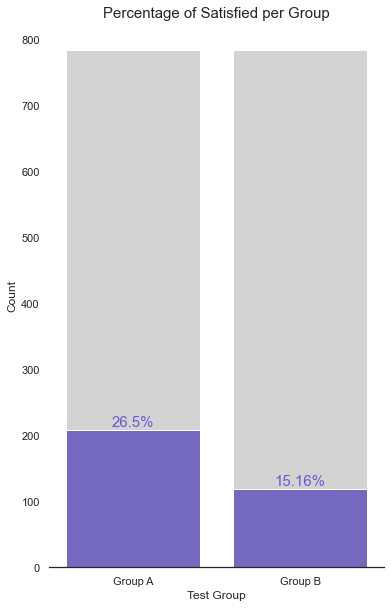

In [85]:
# Plot stacked bars
plt.figure(figsize=(6, 10))

plot_total = sns.barplot(x=plot_data['Test Group'], 
                        y=plot_data['Total'], color='lightgrey')

plot_satisfied = sns.barplot(x=plot_data['Test Group'], 
                            y=plot_data['Satisfied'], color=color)

# Set labels and title
plt.title('Percentage of Satisfied per Group', fontsize=15)
plt.ylabel('Count')
plt.tick_params(left=False,bottom=False,labelleft=True,labelbottom=True)

# Put values on top of bars
row_list = []
for index, row in plot_data[plot_data['Test Group'] == 'Group A'][['Satisfied', 'Satisfied Rate']].iterrows():
    plot_total.text(row.name, row['Satisfied']+5, str(round(100 * row['Satisfied Rate'], 2)) + '%', 
                    color=color, ha="center", fontsize=15)
for index, row in plot_data[plot_data['Test Group'] == 'Group B'][['Satisfied', 'Satisfied Rate']].iterrows():
    plot_satisfied.text(row.name, row['Satisfied']+5, str(round(100 * row['Satisfied Rate'], 2)) + '%', 
                        color=color, ha="center", fontsize=15)
# Show the plot
plt.show()